In [7]:
%matplotlib inline
from aps_figures.aps_one_column import *
import sys
sys.path.append('../')
import h5py as hp
import numpy as np
import matplotlib.pyplot as plt
def plot_mbtrack2(ax, ax_fft):
    f = hp.File('beam_monitor.hdf5')
    mean_y = f['Beam']['mean'][2,:,:].flatten(order='F')
    sigma_y = f['Beam']['std'][2,:,:].flatten(order='F')
    sigma_x = f['Beam']['std'][0,:,:].flatten(order='F')
    print(sigma_x[0], sigma_y[0])
    last_turn = f['Beam']['mean'][0,0,:].shape[0]
    f.close()
    print(mean_y)
    turns = np.linspace(0, last_turn, last_turn*416)
    ax.plot(turns, mean_y/sigma_y[0], label='mbtrack2')
    
    # f = hp.File('beam_monitor.hdf5')
    # mean_y = f['Beam']['mean'][2,0,:]
    # f.close()
    yF = np.abs(np.fft.rfft(mean_y))
    yfreq =416*np.fft.rfftfreq(mean_y.shape[0])
    ax_fft.plot(yfreq, yF/np.max(yF), label=None)

In [8]:
def plot_pyht(ax, ax_fft):
    def get_bunch_data(index):
        f = hp.File('BM(n_bunch={0:}).h5'.format(index))
        mean_y = f['Bunch']['mean_y'][:]
        f.close()
        return mean_y
    f = hp.File('BM(n_bunch={0:}).h5'.format(0))
    sigma_y = f['Bunch']['sigma_y'][0] 
    sigma_x = f['Bunch']['sigma_x'][0] 
    
    last_turn = f['Bunch']['mean_y'].shape[0]
    f.close()
    means = np.empty(shape=(416, last_turn))
    for i in range(416):
        means[i] = get_bunch_data(i)
    mean_y_beam = means.flatten(order='F')
    turns = np.linspace(0, last_turn, last_turn*416)
    ax.plot(turns, mean_y_beam/sigma_y, label='PyHT', alpha=0.5)
    yF = np.abs(np.fft.rfft(mean_y_beam))
    yfreq = 416*np.fft.rfftfreq(mean_y_beam.shape[0])
    ax_fft.plot(yfreq, yF/np.max(yF), label=None)

1.6438614835924578e-05 1.0075237109781073e-05
[-7.58941521e-23  1.46367293e-22 -1.51788304e-22 ...  1.69667706e-07
 -1.58248776e-07 -9.54883499e-08]


Text(0, 0.5, 'Beam c.\\,m. offset, $y/\\sigma_y$')

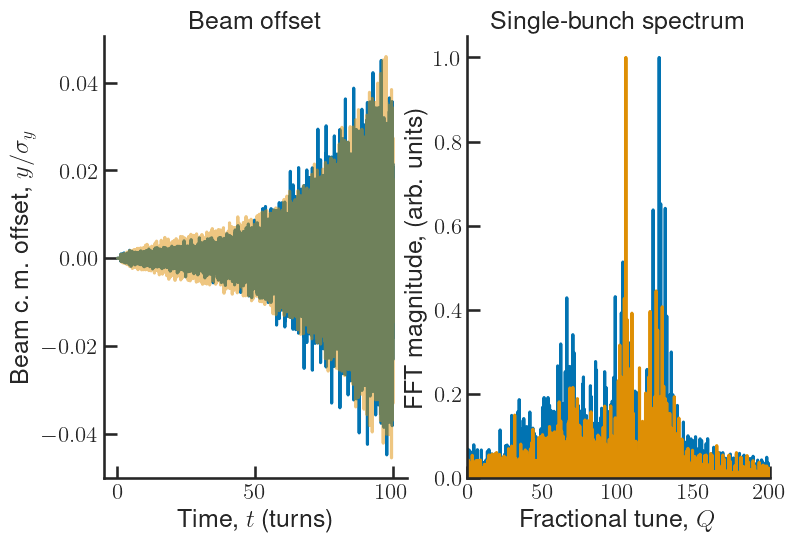

In [9]:
%matplotlib inline
fig, (ax, ax_fft) = plt.subplots(1, 2)
plot_mbtrack2(ax, ax_fft)
plot_pyht(ax, ax_fft)
ax_fft.set_xlabel('Fractional tune, $Q$')
ax_fft.set_ylabel('FFT magnitude, (arb. units)')
ax_fft.title.set_text('Single-bunch spectrum')
ax_fft.set_ylim(0, )
ax_fft.set_xlim(0, 200)

ax.title.set_text('Beam offset')
ax.set_xlabel('Time, $t$ (turns)')
ax.set_ylabel('Beam c.\,m. offset, $y/\sigma_y$')
# plt.figlegend(loc='center right')

(416, 100)


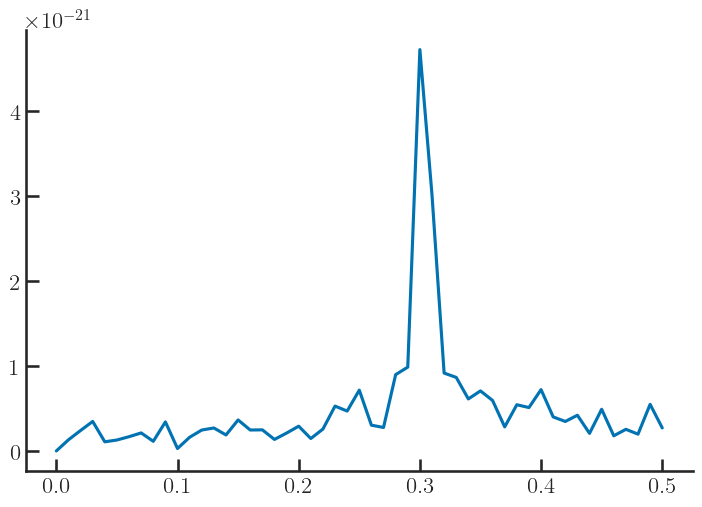

In [5]:
f = hp.File('beam_monitor.hdf5')
mean_y = f['Beam']['mean'][2,:,:]
f.close()
print(mean_y.shape)
yF = np.abs(np.fft.rfft(mean_y[0]))
yOmega = np.fft.rfftfreq(mean_y.shape[1])
plt.plot(yOmega, yF)